<a href="https://colab.research.google.com/github/noow33s/cos3302week2/blob/main/house_data_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: BOOK => [link text](https://www.bookdepository.com/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow-Aurelien-Geron/9781492032649?redirected=true&utm_medium=Google&utm_campaign=Base1&utm_source=TH&utm_content=Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow&selectCurrency=THB&w=AF5NAU96Q22YV5A8VRSH) Hands on Machine Learning with Scikit Learn Keras and TensorFlow 2nd Edition-2019

### import libraries

In [63]:
import os
import tarfile
from six.moves import urllib

### Download a csv file named housing

In [64]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [65]:
#mothod for fetching data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [66]:
fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH)

### Read a csv file named housing

In [67]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### Explore basic information 

In [68]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [19]:
hos=housing["ocean_proximity"].value_counts()
hos

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Visualize data

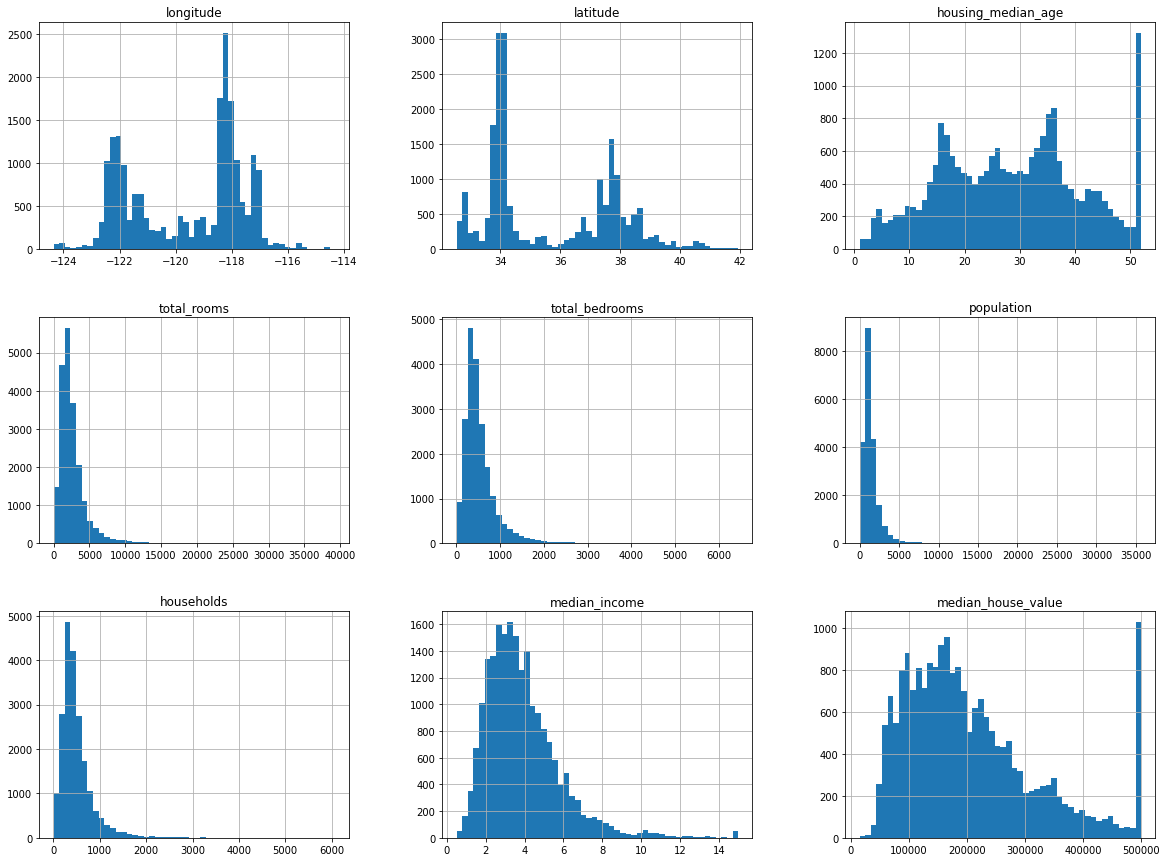

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Split training and testing sets

#### Split data by dataset length

In [23]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [24]:
train_set, test_set = split_train_test(housing, 0.2)
print('train data =',len(train_set))
print('test data =',len(test_set))

train data = 16512
test data = 4128


#### Split data by id

In [17]:
#low level access to GNU zlib compression library 
from zlib import crc32 

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print('train data =',len(train_set))
print('test data =',len(test_set))

train data = 16512
test data = 4128


#modified data

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Plot relationship

In [35]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [38]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

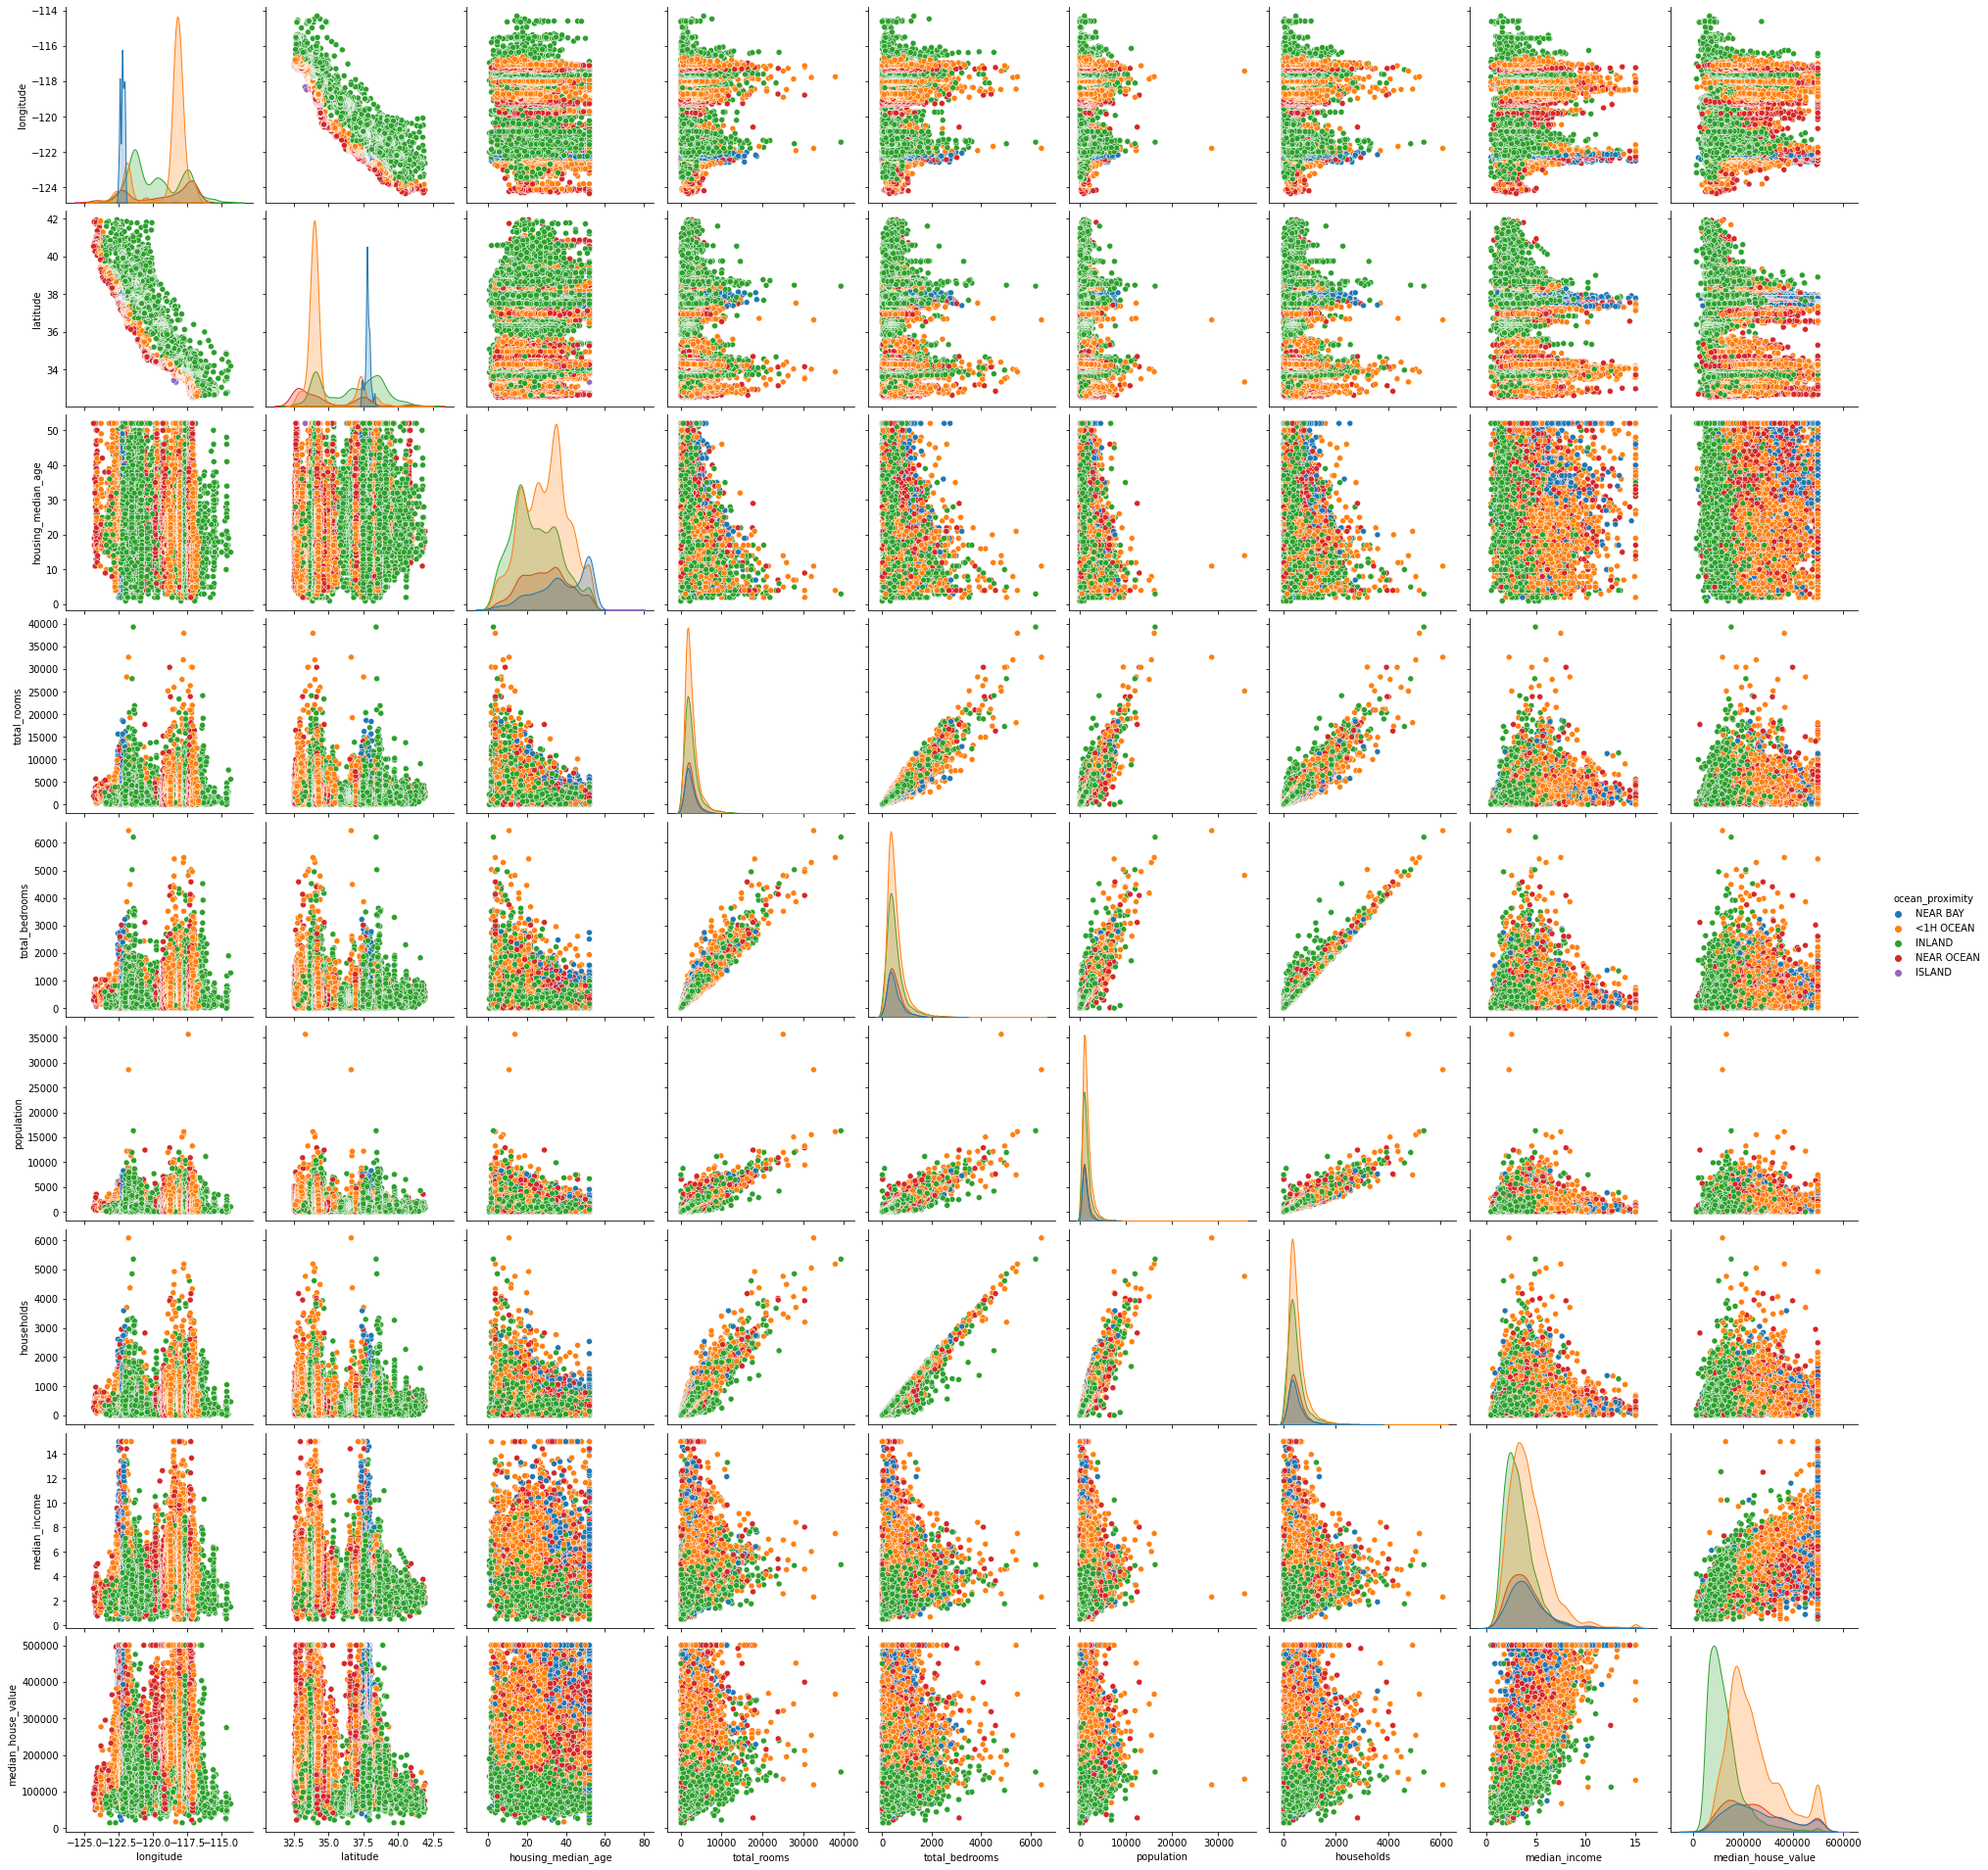

In [36]:
sns.pairplot(housing, height=3, diag_kind = 'kde',hue="ocean_proximity");

Plot correlation heatmap

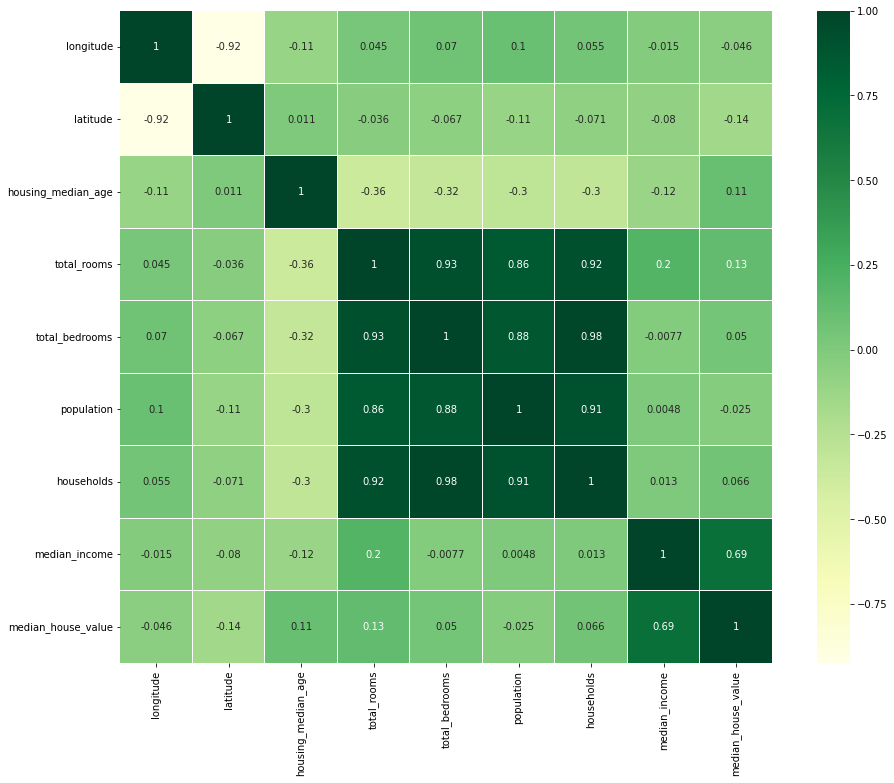

In [39]:
corr = housing.corr()
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)

Cross-tabular

In [129]:
pd.crosstab(housing['longitude'],housing['latitude'],margins=True)

latitude,32.54,32.55,32.56,32.57,32.58,32.59,32.6,32.61,32.62,32.63,...,41.79,41.8,41.81,41.82,41.84,41.86,41.88,41.92,41.95,All
longitude,,,,,,,,,,,,,,,,,,,,,
-124.35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-124.3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,2
-124.27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-124.26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-124.25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-114.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-114.49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-114.47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Box plot

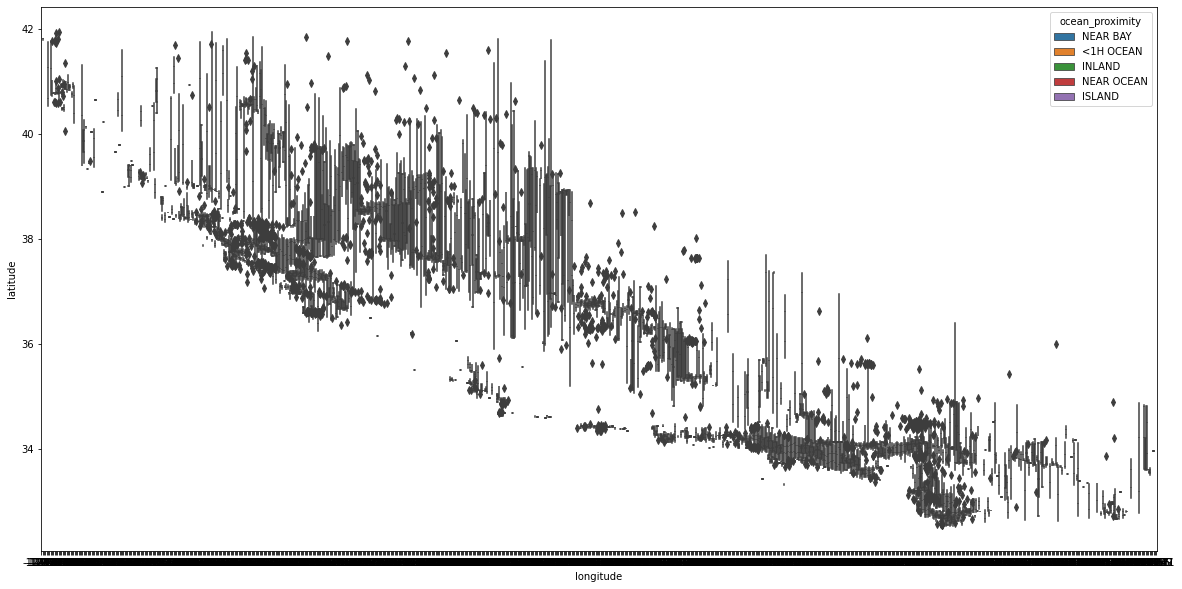

In [69]:
plt.figure(figsize=(20,10))
sns.boxplot(x="longitude",y="latitude", hue="ocean_proximity", data=housing)

Group atrributes

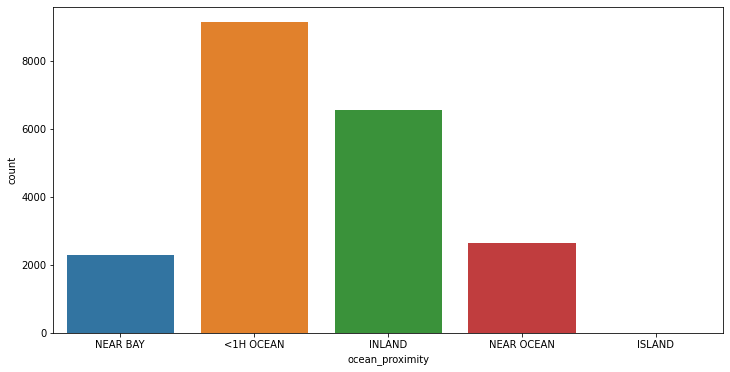

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data = housing, x = "ocean_proximity")

Drop attributes or missing data

In [54]:
housing = housing.drop(columns='median_house_value')
housing = housing.drop(columns='median_income')
housing = housing.drop(columns='longitude')
housing = housing.drop(columns='latitude')
housing = housing.drop(columns='housing_median_age')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   total_rooms      20640 non-null  float64
 1   total_bedrooms   20433 non-null  float64
 2   population       20640 non-null  float64
 3   households       20640 non-null  float64
 4   ocean_proximity  20640 non-null  object 
dtypes: float64(4), object(1)
memory usage: 806.4+ KB


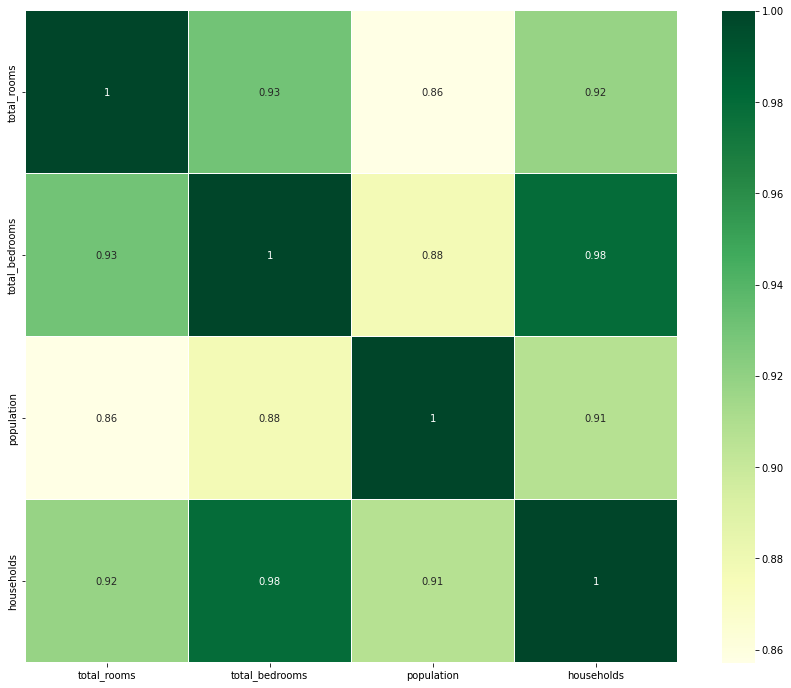

In [55]:
corr = housing.corr()
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)